In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\RESHM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


LIBRARIES AND LOAD DATA

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\RESHM\\Downloads\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv")


print(df.head())

print("Dataset shape:", df.shape)


print(df.info())


print(df['Churn'].value_counts())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

DATA CLEANING

In [6]:
# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric (handle errors by converting invalids to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing TotalCharges (only a few)
df = df.dropna()

# Verify data types again
print(df.info())


Missing values per column:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines   

LABEL ENCODER

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print(df.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

EXPLORATORY DATA ANALYSIS(EDA)

1.CHURN DISTRIBUTION


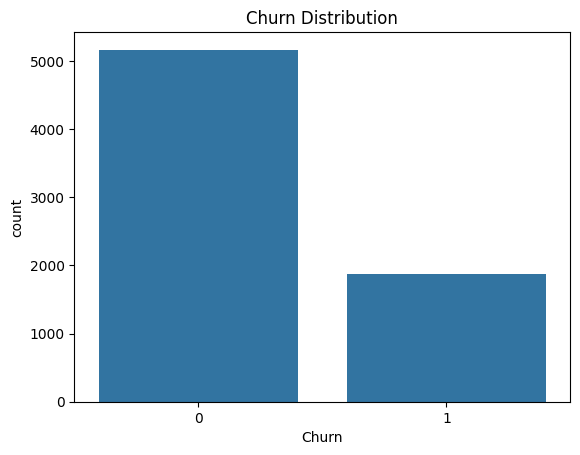

Churn Rate (%):
 Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [8]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)


2.CHURN BY GENDER

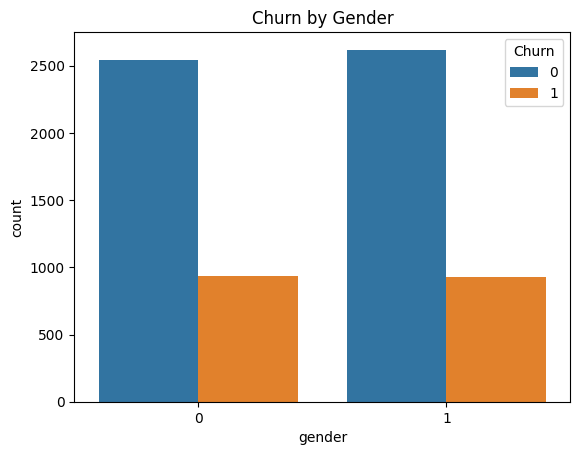

In [13]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


3.CHURN BY CONTRACT TYPE

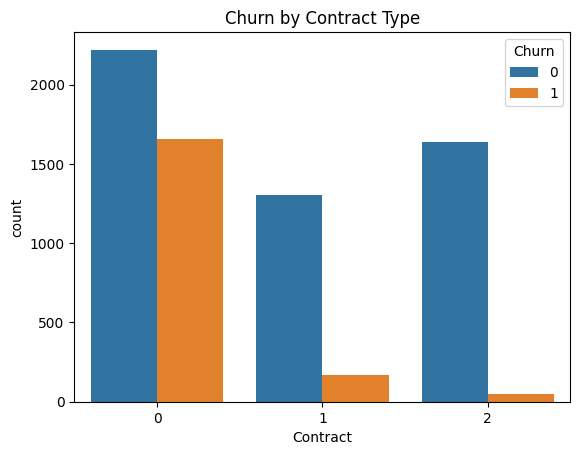

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


4.CHURN BY MONTHLY CHARGES

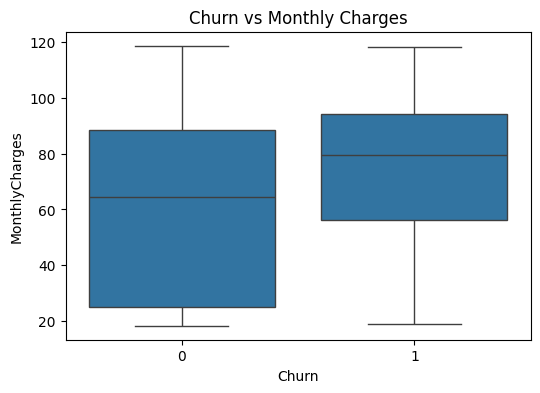

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()


5.CHURN BY TENURE

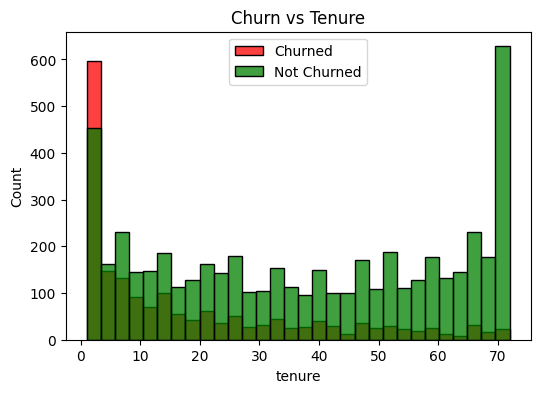

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Churn']==1]['tenure'], bins=30, color="red", label="Churned")
sns.histplot(df[df['Churn']==0]['tenure'], bins=30, color="green", label="Not Churned")
plt.legend()
plt.title("Churn vs Tenure")
plt.show()


Train-Test Split + Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)   # all columns except Churn
y = df['Churn']                # target column

# Step 2: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7874911158493249

Confusion Matrix:
 [[923 110]
 [189 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\RESHM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Importance

             Feature  Importance
5       PhoneService   -1.009832
14          Contract   -0.732122
15  PaperlessBilling    0.296845
8     OnlineSecurity   -0.292673
11       TechSupport   -0.282004
1      SeniorCitizen    0.275824
7    InternetService    0.249261
3         Dependents   -0.241305
9       OnlineBackup   -0.120858
10  DeviceProtection   -0.071549


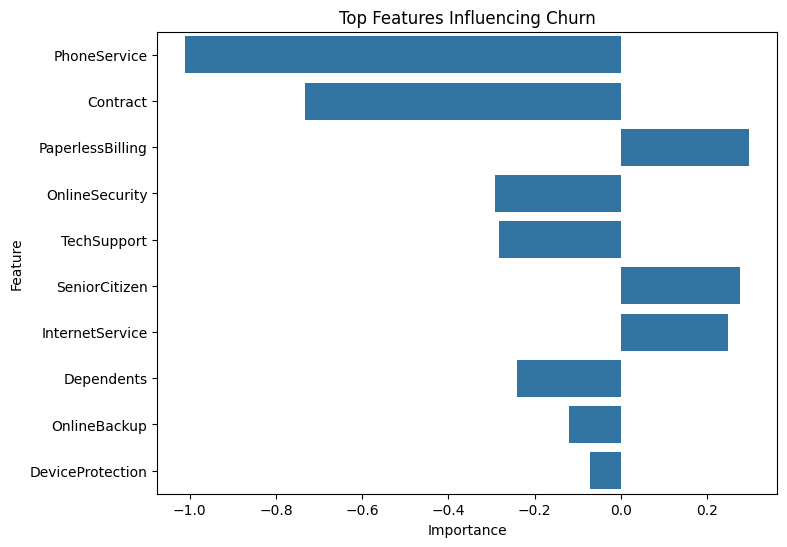

In [18]:
import numpy as np

# Get feature importance (coefficients from logistic regression)
importance = model.coef_[0]

# Match each feature with its importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by absolute importance
feature_importance = feature_importance.reindex(
    feature_importance['Importance'].abs().sort_values(ascending=False).index
)

# Show top 10 features
print(feature_importance.head(10))

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top Features Influencing Churn")
plt.show()


DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth to avoid overfitting
dt_model.fit(X_train, y_train)

# Step 2: Predictions
y_pred_dt = dt_model.predict(X_test)

# Step 3: Evaluation
print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_dt))


✅ Decision Tree Accuracy: 0.7882018479033405

📊 Confusion Matrix:
 [[938  95]
 [203 171]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



Visualize the Decision Tree

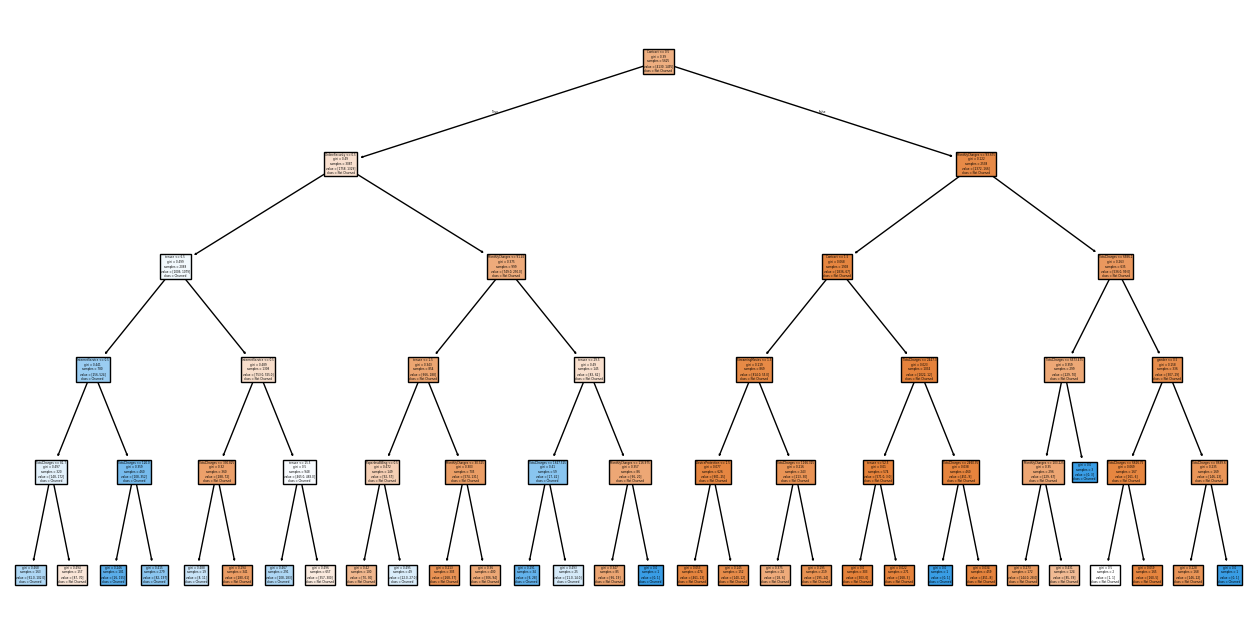

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Not Churned","Churned"], filled=True)
plt.show()
